In [2]:
import torch
import matplotlib.pyplot as plt

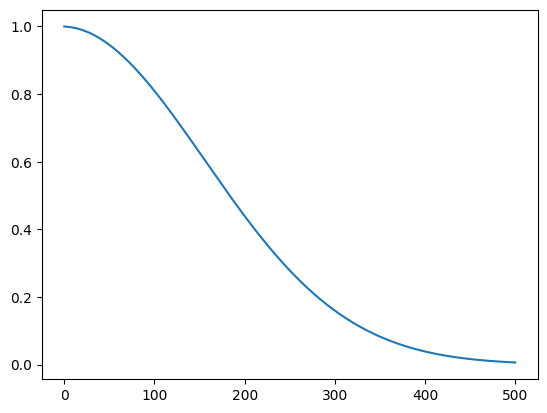

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))

time_steps = 500
beta1 = 1e-4
beta2 = 0.02
b_t = (beta2 - beta1) * torch.linspace(0, 1, time_steps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()
ab_t[0] = 1

plt.plot(ab_t.to('cpu'))
plt.show()

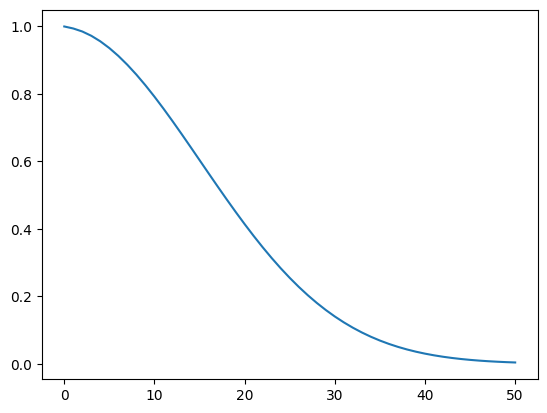

In [4]:

time_steps = 50
beta1 = 1e-4*10
beta2 = 0.02*10
b_t = (beta2 - beta1) * torch.linspace(0, 1, time_steps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()
ab_t[0] = 1

plt.plot(ab_t.to('cpu'))
plt.show()


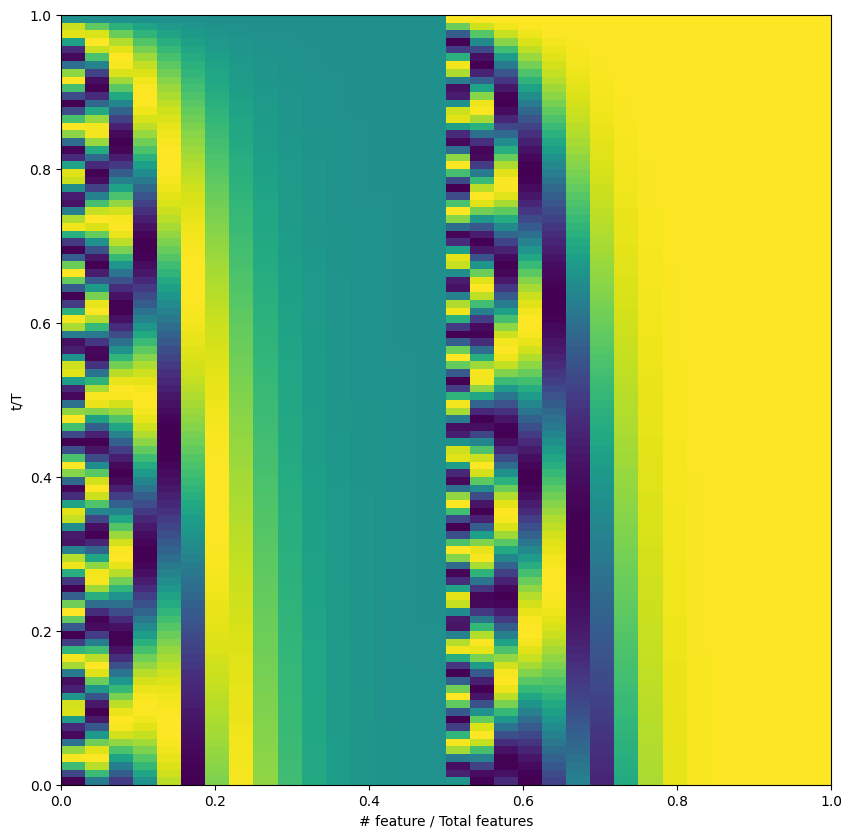

In [98]:
import math
time_steps = 100
emb_dim = 32
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
embeddings = math.log(10000) / (half_dim - 1)
embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None] * embeddings[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)

plt.figure(figsize=[10,10])
plt.imshow(embeddings[:,:].to('cpu'), extent=[0,1,0,1])
plt.xlabel('# feature / Total features')
plt.ylabel("t/T")
#plt.xlim(0,10)
plt.show()


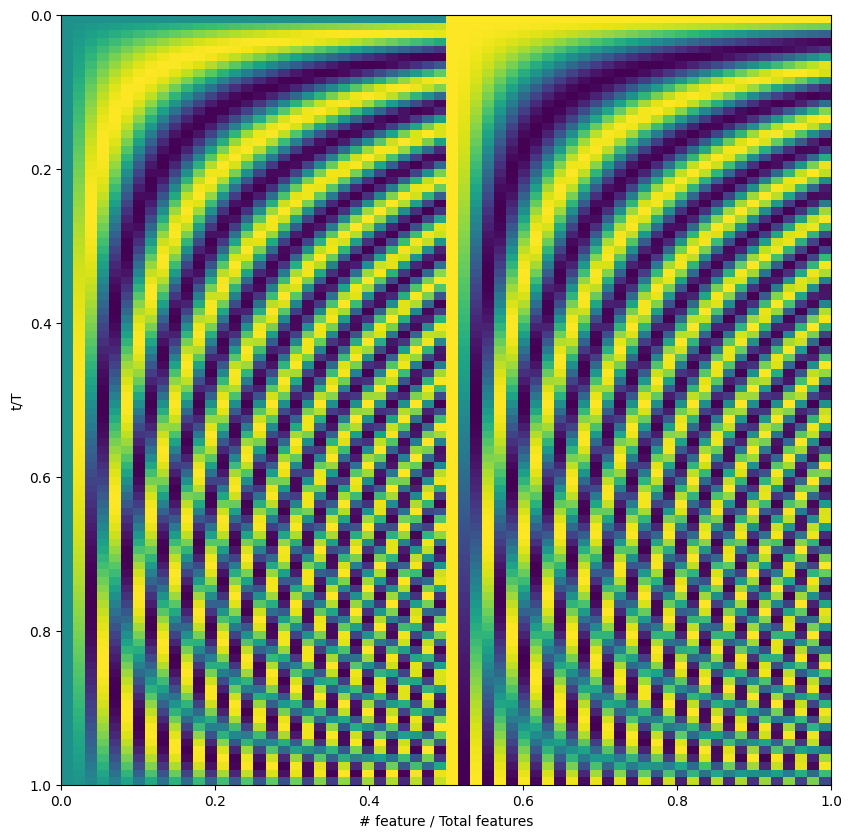

In [99]:

import math
emb_dim = 64
time_steps = 100
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
freqs = torch.arange(0,half_dim) / half_dim * math.pi
# embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None]/time_steps*half_dim * freqs[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)


plt.figure(figsize=[10,10])
plt.imshow(embeddings[:,:].to('cpu'), extent=[0,1,1,0])
plt.xlabel('# feature / Total features')
plt.ylabel("t/T")
#plt.xlim(0,10)
plt.show()


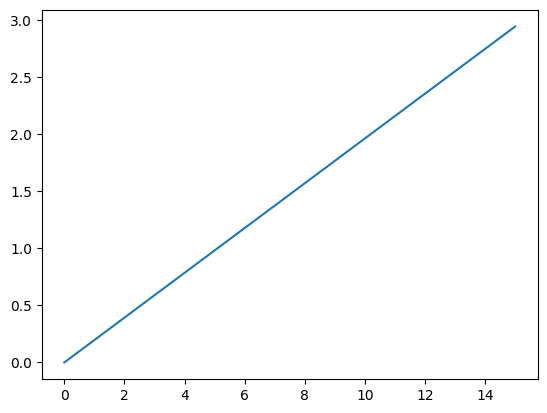

In [55]:
import math
emb_dim = 32
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
freqs = torch.arange(0,half_dim) / half_dim * math.pi
# embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None] * freqs[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
